In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
data = pd.read_csv(r'/content/flights-larger.csv')
data = data.sample(frac = 0.1, random_state = 42)
print(f"shape: {data.shape}")
data.head()

shape: (8956, 10)


,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
61020,4,14,3,OO,5672,SFO,158,18.00,58,-2.0
21254,5,30,1,UA,790,SFO,2139,10.97,295,-15.0
78607,2,28,5,WN,281,SJC,621,21.42,105,26.0
77286,9,28,2,UA,950,ORD,589,13.17,115,141.0
8790,3,12,6,OO,6439,ORD,213,20.67,62,61.0


In [3]:
df = pd.DataFrame(data)
df

,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
61020,4,14,3,OO,5672,SFO,158,18.00,58,-2.0
21254,5,30,1,UA,790,SFO,2139,10.97,295,-15.0
78607,2,28,5,WN,281,SJC,621,21.42,105,26.0
77286,9,28,2,UA,950,ORD,589,13.17,115,141.0
8790,3,12,6,OO,6439,ORD,213,20.67,62,61.0
...,...,...,...,...,...,...,...,...,...,...
78427,2,3,1,UA,575,ORD,1721,15.17,268,5.0
26771,2,17,1,AA,363,LGA,733,20.00,155,36.0
62800,3,22,2,AA,356,ORD,733,9.42,125,41.0
75081,9,31,5,WN,1584,SMF,647,13.25,110,24.0


In [4]:
df.info

<bound method DataFrame.info of        mon  dom  dow carrier  flight  org  mile  depart  duration  delay
61020    4   14    3      OO    5672  SFO   158   18.00        58   -2.0
21254    5   30    1      UA     790  SFO  2139   10.97       295  -15.0
78607    2   28    5      WN     281  SJC   621   21.42       105   26.0
77286    9   28    2      UA     950  ORD   589   13.17       115  141.0
8790     3   12    6      OO    6439  ORD   213   20.67        62   61.0
...    ...  ...  ...     ...     ...  ...   ...     ...       ...    ...
78427    2    3    1      UA     575  ORD  1721   15.17       268    5.0
26771    2   17    1      AA     363  LGA   733   20.00       155   36.0
62800    3   22    2      AA     356  ORD   733    9.42       125   41.0
75081    9   31    5      WN    1584  SMF   647   13.25       110   24.0
88288    4   11    0      UA     628  ORD   612   20.75       103   34.0

[8956 rows x 10 columns]>

In [5]:
# Check missing value
df.isnull().sum().to_frame('NaN value').T

,mon,dom,dow,carrier,flight,org,mile,depart,duration,delay
NaN value,0,0,0,0,0,0,0,0,0,541


In [6]:
# check for null values in each column
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())



delay    541
dtype: int64


In [7]:
# check for null values in each row
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

       mon  dom  dow carrier  flight  org  mile  depart  duration  delay
33985    4    3    6      AA     337  LGA   733   14.98       155    NaN
69369    0   29    2      WN    1019  SFO   337   14.42        90    NaN
73125    0   13    0      OO    6207  ORD   174   10.00        57    NaN
74107    8   30    2      UA     870  SFO  1846   13.92       249    NaN
58146    3   17    4      WN    3675  SJC   308   11.42        70    NaN
...    ...  ...  ...     ...     ...  ...   ...     ...       ...    ...
8938     3   19    6      WN    3124  SMF   404    6.50        85    NaN
51957    0   17    4      US    2189  LGA   214   20.00        82    NaN
87072    8   29    1      US     183  SMF   647    6.00       114    NaN
46869   10   10    1      UA     289  ORD  1846   13.27       293    NaN
82309    2   31    1      UA     695  LGA   733   19.98       160    NaN

[541 rows x 10 columns]


In [8]:
# filling  null values in 'delay' column with random integers between -30 and 170
#df['delay'].fillna(np.random.randint(-30, 171), inplace=True)


In [9]:
# Remove the 'flight' column
df =  df.drop('flight', axis = 1)

# Remove records with missing 'delay' values
#flights_valid_delay = flights_drop_column.filter('delay IS NOT NULL')

# Remove records with missing values 
df = df.dropna()
print(df.count())

mon         8415
dom         8415
dow         8415
carrier     8415
org         8415
mile        8415
depart      8415
duration    8415
delay       8415
dtype: int64


In [10]:
# check for null values in each column
null_columns = df.columns[df.isnull().any()]
print(df[null_columns].isnull().sum())


Series([], dtype: float64)


In [11]:
# check count of unique values in each columns
for col in df:
    print(f"{col}: {df[col].nunique()}")

mon: 12
dom: 31
dow: 7
carrier: 9
org: 8
mile: 307
depart: 856
duration: 372
delay: 334


In [12]:
# more details
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
mon,8415.0,5.334997,3.402355,0.00,2.00,5.0,8.0,11.00
dom,8415.0,15.836958,8.758915,1.00,8.00,16.0,23.0,31.00
dow,8415.0,2.928342,1.981426,0.00,1.00,3.0,5.0,6.00
mile,8415.0,898.041711,715.279543,67.00,358.00,678.0,1223.0,4243.00
depart,8415.0,14.063944,4.673651,0.25,9.97,14.0,18.0,23.98
duration,8415.0,153.527035,89.139952,30.00,85.00,125.0,200.0,560.00
delay,8415.0,26.850267,53.124855,-61.00,-7.00,14.0,42.0,942.00


In [13]:
df.describe(include=[object]).T

,count,unique,top,freq
carrier,8415,9,UA,2222
org,8415,8,ORD,3173


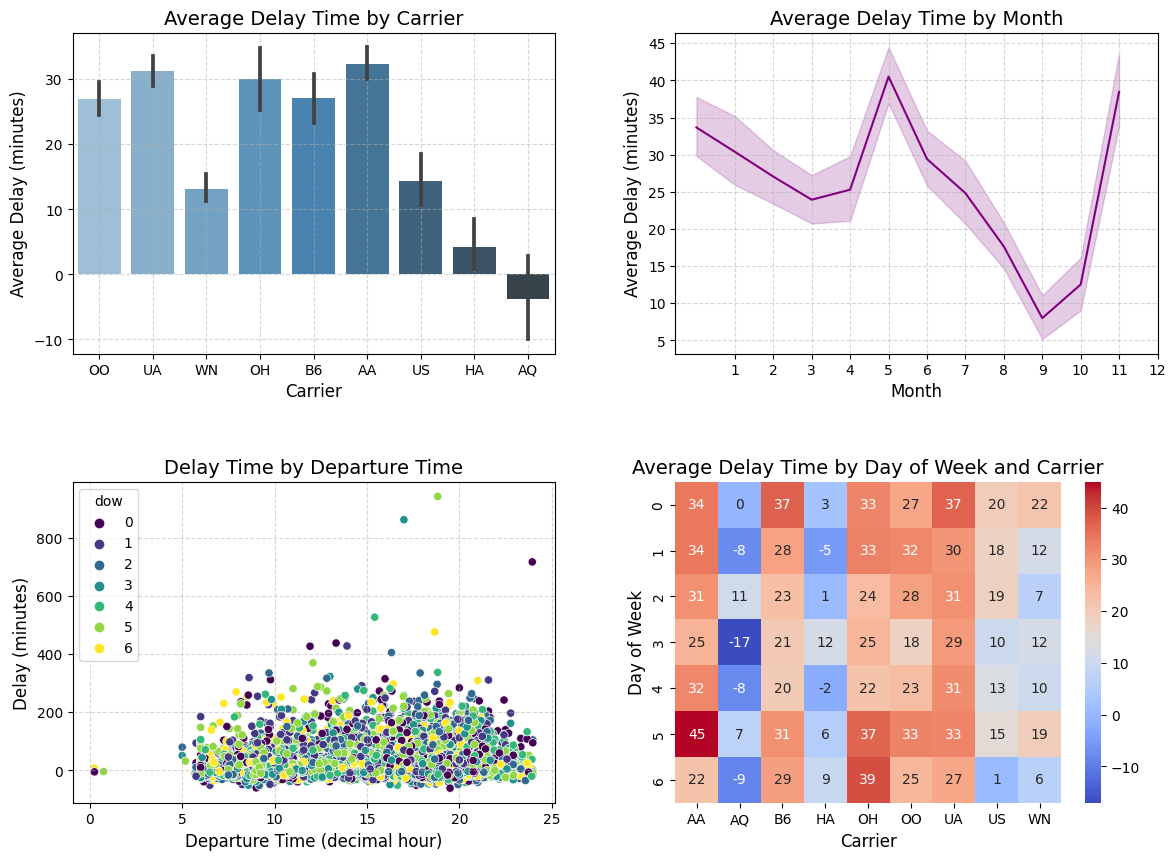

In [14]:
# Create a figure with subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(14,10))
plt.subplots_adjust(wspace=0.25, hspace=0.4) # Adjust spacing between subplots

# Subplot 1: Bar chart of average delay time by carrier
sns.barplot(x='carrier', y='delay', data=df, ax=axs[0,0], palette='Blues_d')
axs[0,0].set_xlabel('Carrier', fontsize=12)
axs[0,0].set_ylabel('Average Delay (minutes)', fontsize=12)
axs[0,0].set_title('Average Delay Time by Carrier', fontsize=14)
axs[0,0].tick_params(axis='both', labelsize=10)
axs[0,0].grid(True, alpha=0.5, linestyle='--')

# Subplot 2: Line chart of average delay time by month
sns.lineplot(x='mon', y='delay', data=df, ax=axs[0,1], color='purple')
axs[0,1].set_xlabel('Month', fontsize=12)
axs[0,1].set_ylabel('Average Delay (minutes)', fontsize=12)
axs[0,1].set_title('Average Delay Time by Month', fontsize=14)
axs[0,1].tick_params(axis='both', labelsize=10)
axs[0,1].set_xticks(range(1,13))
axs[0,1].grid(True, alpha=0.5, linestyle='--')

# Subplot 3: Scatterplot of delay time by departure time
sns.scatterplot(x='depart', y='delay', data=df, ax=axs[1,0], hue='dow', palette='viridis')
axs[1,0].set_xlabel('Departure Time (decimal hour)', fontsize=12)
axs[1,0].set_ylabel('Delay (minutes)', fontsize=12)
axs[1,0].set_title('Delay Time by Departure Time', fontsize=14)
axs[1,0].tick_params(axis='both', labelsize=10)
axs[1,0].grid(True, alpha=0.5, linestyle='--')

# Subplot 4: Heatmap of average delay time by day of week and carrier
carrier_delay = df.pivot_table(values='delay', index='dow', columns='carrier')
sns.heatmap(carrier_delay, cmap='coolwarm', ax=axs[1,1], annot=True, fmt=".0f")
axs[1,1].set_xlabel('Carrier', fontsize=12)
axs[1,1].set_ylabel('Day of Week', fontsize=12)
axs[1,1].set_title('Average Delay Time by Day of Week and Carrier', fontsize=14)
axs[1,1].tick_params(axis='both', labelsize=10)


In [15]:
# check for duplicates based on all columns
duplicate_rows = df[df.duplicated()]
# print the duplicate rows
print(duplicate_rows)








Empty DataFrame
Columns: [mon, dom, dow, carrier, org, mile, depart, duration, delay]
Index: []


In [16]:
corr_matrix = df.corr()


<ipython-input-16-b69b4b6a6184>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


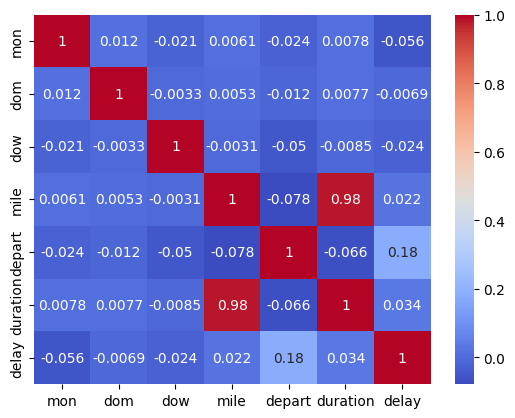

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [18]:
df.head()

,mon,dom,dow,carrier,org,mile,depart,duration,delay
61020,4,14,3,OO,SFO,158,18.00,58,-2.0
21254,5,30,1,UA,SFO,2139,10.97,295,-15.0
78607,2,28,5,WN,SJC,621,21.42,105,26.0
77286,9,28,2,UA,ORD,589,13.17,115,141.0
8790,3,12,6,OO,ORD,213,20.67,62,61.0


In [19]:
#import plotly.graph_objects as go

#fig = go.Figure(df=[go.Scatter3d(x=df['depart'],
                                   #y=df['mon'],
                                   #z=df['org'],
                                   #mode='markers',
                                   #marker=dict(color=df['delay'], size=5))])

#fig.show()


In [20]:
# Convert columns 'mile' to 'km' and then drop it
# Convert miles to kilometers
df['km'] = df['mile'] * 1.60934

# Drop the miles column
df.drop('mile', axis=1, inplace=True)


# Create 'label' column indicating whether a flight is delayed or not
df['label'] = (df['delay'] >= 15).astype(int)

# Check first five records
df.head(5)


,mon,dom,dow,carrier,org,depart,duration,delay,km,label
61020,4,14,3,OO,SFO,18.00,58,-2.0,254.27572,0
21254,5,30,1,UA,SFO,10.97,295,-15.0,3442.37826,0
78607,2,28,5,WN,SJC,21.42,105,26.0,999.40014,1
77286,9,28,2,UA,ORD,13.17,115,141.0,947.90126,1
8790,3,12,6,OO,ORD,20.67,62,61.0,342.78942,1


In [21]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
df['carrier_idx'] = le.fit_transform(df['carrier'])
df['org_idx'] = le.fit_transform(df['org'])

# Preview first five records
df.head()

,mon,dom,dow,carrier,org,depart,duration,delay,km,label,carrier_idx,org_idx
61020,4,14,3,OO,SFO,18.00,58,-2.0,254.27572,0,5,4
21254,5,30,1,UA,SFO,10.97,295,-15.0,3442.37826,0,6,4
78607,2,28,5,WN,SJC,21.42,105,26.0,999.40014,1,8,5
77286,9,28,2,UA,ORD,13.17,115,141.0,947.90126,1,6,3
8790,3,12,6,OO,ORD,20.67,62,61.0,342.78942,1,5,3


In [22]:
import pandas as pd

# create a new dataframe with the predictor variables
X = pd.concat([df['mon'], df['dom'], df['dow'], df['carrier_idx'], df['org_idx'], df['km'], df['depart'], df['duration']], axis=1)

# create a new dataframe with the target variable
y = df['delay']

# combine the predictor and target dataframes
df_flights= pd.concat([X, y], axis=1)

# rename the target column to 'label'
df_flights = df_flights.rename(columns={'delay': 'label'})

# check the resulting dataframe
print(df_flights.head())


       mon  dom  dow  carrier_idx  org_idx          km  depart  duration  \
61020    4   14    3            5        4   254.27572   18.00        58   
21254    5   30    1            6        4  3442.37826   10.97       295   
78607    2   28    5            8        5   999.40014   21.42       105   
77286    9   28    2            6        3   947.90126   13.17       115   
8790     3   12    6            5        3   342.78942   20.67        62   

       label  
61020   -2.0  
21254  -15.0  
78607   26.0  
77286  141.0  
8790    61.0  


In [23]:
#sseperating the label variable from the feature column
#y = df_flights['label'] 
##X = df_flights.drop('label', axis = 1)
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [24]:
#scaler = StandardScaler()
#scaled_data = scaler.fit_transform(X)

In [25]:
#pca = PCA(n_components = 2)
#X_pca = pca.fit_transform(scaled_data)


# Machine Learning Models


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_flights.drop('label',axis = 1), df['label'], test_size=0.3, random_state=42)

# Define the machine learning models to train
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Neural Network', MLPClassifier(random_state=42))
    
]
#model = ('Random Forest', RandomForestClassifier(random_state=42))
# Train and evaluate each model
results = []
for name, model in models:
    print('Training', name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    (name, 'accuracy:', accuracy)
    (name, 'precision:', precision)
    (name, 'recall:', recall)
    (name, 'F1 score:', f1) 
    results.append((name, accuracy, precision, recall, f1))

    #Create a DataFrame from the results and print it out
    df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    print(df_results)

Training Random Forest
           Model  Accuracy  Precision    Recall  F1 Score
0  Random Forest  0.631683   0.642628  0.623639  0.632991
Training Gradient Boosting
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.631683   0.642628  0.623639  0.632991
1  Gradient Boosting  0.647129   0.652982  0.655521  0.654249
Training SVM
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.631683   0.642628  0.623639  0.632991
1  Gradient Boosting  0.647129   0.652982  0.655521  0.654249
2                SVM  0.545743   0.555645  0.539658  0.547535
Training KNN
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.631683   0.642628  0.623639  0.632991
1  Gradient Boosting  0.647129   0.652982  0.655521  0.654249
2                SVM  0.545743   0.555645  0.539658  0.547535
3                KNN  0.562376   0.572112  0.558320  0.565132
Training Neural Network
               Model  Accuracy  Precisio

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 500],
    'max_depth': [3, 5]
}

gb = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}
0.6466893039049236


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Instantiate the Gradient Boosting Classifier with the best hyperparameters
gb_clf = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)

# Fit the classifier on the entire training dataset
gb_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_clf.predict(X_test)

# Evaluate the model on the test set
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.63      0.64      1239
           1       0.65      0.66      0.66      1286

    accuracy                           0.65      2525
   macro avg       0.65      0.65      0.65      2525
weighted avg       0.65      0.65      0.65      2525



In [30]:
import pickle

# save the model to disk
AFDP = 'finalized_model.pkl'
pickle.dump(gb_clf, open(AFDP, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(AFDP, 'rb'))

# make a prediction using the loaded model
result = loaded_model.predict(X_test)
